# **Neural Networks from Scratch**

In [ ]:
import pandas as pd, matplotlib.pyplot as plt, pandas as pd, numpy as np
from tqdm import tqdm
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import networkx as nx

#### **Notation for Neural Networks**

There are some different mathematical notations used when working with neural networks. I am also using a few textbooks which don't necessarily use the same notation and terms as in Jan's videos, so here i will try to make the mathematical notation that i will use completely clear.

Let's denote any layer in our neural network with $L^n$ with $n$ being the number of the layer starting from the first hidden layer. We denote the weight matrix for a specific layer with $W^L$ and it consists of the individual weights $w^L_{j,k}$ that each connect node $k$ in the layer $L-1$ with node $j$ in the layer $L$.

We further denote an input matrix $a_n$ with and extra row of 0's added to account for the bias as $a_n'$

Our weight matrix for the layer $L$ depends on two numbers, the number of inputs, which we refer to as $K$ and the number of nodes in the layer which we refer to as $J$. Our weight matrix will have $J$ rows and $K$ columns. To account for an extra weight needed for the bias term in the previous layer, our number of inputs must have be one larger than otherwise expected. And so the weight matrix is $W^L_{(J,K+1)}$.

To assure that our weight matrix has the same number of rows, $K$ as the number of inputs to the layer ($a_{L-1}'$) has columns, which is needed to satisfy the prerequisite for matrix multiplication, we need to transpose the weight matrix. Obviously we could have just switched the $J$ and $K$ when initializing, and then not do the transposition, but i'm choosing to do it this way, just so the operation stays consistent with the notation for the weights that are used to describe the maths.

When forward propagating an input through the network, then at any layer, the weight matrix is matrix multiplied by the input layer. We can describe this operation with a function $v(X,W)$ that performs the operation $W \cdot X'$. We will generally refer to the output of this as $z^L = v(a^{L-1},W^L)$. Where $a^{L-1}$ denotes the output of the previous layer. For the first hidden layer that would just be our input features, which we might otherwise denote as $X'$.

After the matrix multiplication is performed, the output is activated which we denote $a^L=\sigma(z^L)$ where $\sigma$ denotes the activation function for
that layer.

In [ ]:
def std_scale(X):
  X = (X-X.mean(axis=0))/X.std(axis=0)
  return X

def minmax_scaler(data, feature_range=(0, 1)):
    min_val, max_val = feature_range
    min_data, max_data = np.min(data, axis=0), np.max(data, axis=0)
    scaled_data = min_val + (max_val - min_val) * (data - min_data) / (max_data - min_data)
    return scaled_data

def xavier_init(input_nodes, output_nodes):
    """Xavier/Glorot Initialization."""
    limit = np.sqrt(6.0 / (input_nodes + output_nodes))
    return np.random.uniform(-limit, limit, size=(output_nodes, input_nodes)).T


#### Neural Network With One Node

Let's first consider the simplest case where we will essentially just be doing a linear regression. We wont be using a non-linear activation function and so the derivatives are straight forward to calculate.

We calculate the error as $y-\hat{y}$ which we could also denote as $error = y-a_{out}$.

We can think of the simple neural network as a composite of two functions, that is $C(v(X,W)) = C(a_{out})$ so we first calculate a matrix multiplication of the weights and the features, which we denote with the function v and then we calculate the cost. Using the chain rule we know that $\frac{\partial C}{\partial W} = \frac{\partial C}{\partial a_{out}} \cdot \frac{\partial a_{out}}{\partial W}$.

The derivative of the cost function with regards to our $a_out$ is $\frac{\partial C}{ \partial a_{out} } = -(y-a_{out})=-error $.

So $\frac{\partial C}{\partial W} = -(y-a_{out}) \cdot X^T$, which is exactly the gradient of the the cost with regards to each of the weights in our weight matrix.



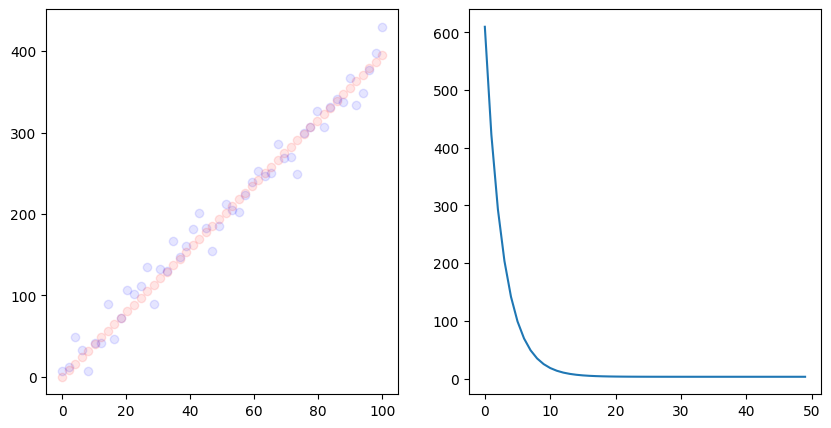

In [ ]:

noise_factor = 20

X = np.linspace(0,100).reshape(-1,1)
y = 4*X+3 + np.random.randn(X.shape[0]).reshape(-1,1) * noise_factor

J = 1
K = 1+1
W = np.random.randn(J,K).T

ones = np.ones(((X.shape[0]), 1))
Xp = np.hstack((ones, X))

eta = 1e-6

losses = []

for epoch in range(50):
  a = np.dot(Xp, W)
  error = (y-a)
  mse = 0.5*(1 / X.shape[0]) * np.mean((y-a)**2)
  losses.append(mse)
  dC_da = -(y-a)
  da_dw = Xp.T
  dC_dw = np.dot(da_dw, dC_da)

  W = W - eta * dC_dw

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(X,y, c = "blue", alpha = 0.1)
ax[0].scatter(X, np.dot(Xp, W), c = "red", alpha = 0.1)
ax[1].plot(losses)

#### **A small classifier**
A classifier with an input layer, hidden layer and output layer.



In [ ]:
n_classes = 2
n_features = 6
samples = 3000
X, y = make_classification(n_samples = samples, n_features = n_features, n_classes = n_classes)

y = y.reshape(-1,1)
X = std_scale(X)
#X = minmax_scaler(X)

N, M = X.shape

relu = lambda X: np.maximum(X, 0)
relu_prime = lambda X: np.where(X <= 0, 0, 1)

sigmoid = lambda X: (1 / (1+np.exp(-X)))
sigmoid_prime = lambda X: sigmoid(X) * (1 - sigmoid(X))

def add_ones(X):
  ones = np.ones((X.shape[0], 1))
  return np.hstack((ones,X))

#### **Backpropagation with one hidden layer**

100%|██████████| 1000/1000 [00:01<00:00, 822.10it/s]


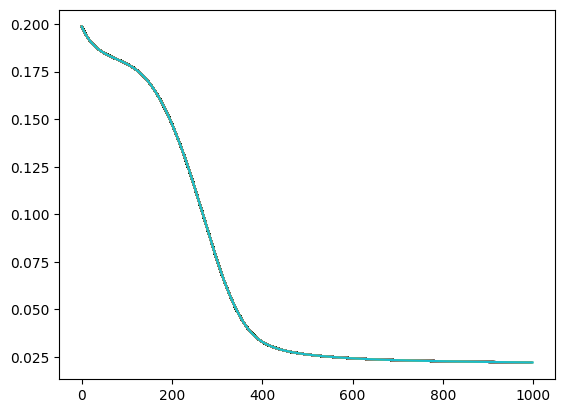

In [ ]:
losses = []
epochs = 1000

hidden_layer_nodes = 5

eta = 1e-4

activation_1 = relu
activation_1_prime = relu_prime
activation_2 = sigmoid
activation_2_prime = sigmoid_prime

w_ih = np.random.randn(hidden_layer_nodes, M+1).T
w_ho = np.random.randn(1, hidden_layer_nodes+1).T


for epoch in tqdm(range(epochs)):

  # Forward propagation
  Xp = add_ones(X)
  zih = np.dot(Xp, w_ih)
  aih = activation_1(zih)

  assert zih.shape == aih.shape

  aihp = add_ones(aih)
  zho = np.dot(aihp, w_ho)
  aho = activation_2(zho)

  error = (y-aho)
  losses.append(0.5*np.mean(error**2))

  # Backpropagation
  dC_daoh = -error # dC/dA = -(y-aoh)
  daoh_dzoh = activation_2_prime(zho)
  dC_dzoh = dC_daoh * daoh_dzoh
  grad_ho = np.dot(aihp.T, dC_dzoh)

  dC_dzih = dC_dzoh * activation_1_prime(zih)
  grad_ih = np.dot(Xp.T, dC_dzih)

  w_ih = w_ih - eta * grad_ih
  w_ho = w_ho - eta*grad_ho

  plt.plot(losses)


In [ ]:
pred_df = pd.DataFrame(np.hstack((aho, y)), columns = ["ypred", "y"])
pred_df["abs_error"] = abs(pred_df.ypred - pred_df.y)
pred_df["score"] = pred_df.abs_error.apply(lambda x: 1 if x<=0.5 else 0)

In [ ]:
pred_df.score.value_counts()

1    2717
0     283
Name: score, dtype: int64

#### **Backpropagation with two hidden layers**

In [ ]:
losses = []
epochs = 6000

hidden_layer_1_nodes = 5
hidden_layer_2_nodes = 5

eta = 0.0017

activation_1, activation_2 = relu, relu
activation_1_prime, activation_2_prime = relu_prime, relu_prime
activation_3 = sigmoid
activation_3_prime = sigmoid_prime


#w_ih1 = np.random.randn(hidden_layer_1_nodes, M+1).T
w_ih1 = tst = xavier_init(M+1, hidden_layer_1_nodes)
#w_h1_h2 = np.random.randn(hidden_layer_2_nodes, hidden_layer_1_nodes+1).T
w_h1_h2 = xavier_init(hidden_layer_1_nodes+1, hidden_layer_2_nodes)
#w_ho = np.random.randn(1, hidden_layer_2_nodes+1).T
w_ho = xavier_init(hidden_layer_2_nodes+1, 1)

for epoch in tqdm(range(epochs)):
  # Forward propagation
  Xp = add_ones(X)
  zih = np.dot(Xp, w_ih1)
  aih = activation_1(zih)

  aih1p = add_ones(aih)
  zh1 = np.dot(aih1p, w_h1_h2)
  ah1 = activation_2(zh1)

  ah2op = add_ones(ah1)
  zh2o = np.dot(ah2op, w_ho)
  ah2o = activation_3(zh2o)

  error = (y-ah2o)
  losses.append(np.mean(error**2))

  # Backpropagation

  dC_daoh = -error # dC/dA = -(y-aoh)
  daoh_dzoh = activation_3_prime(zh2o)
  dC_dzoh = dC_daoh * daoh_dzoh
  grad_ho = np.dot(ah2op.T, dC_dzoh)

  dC_dzh1h2 = dC_dzoh * activation_2_prime(zh1)
  grad_h1h2 = np.dot(aih1p.T, dC_dzh1h2)

  dC_dzih = dC_dzh1h2 * activation_1_prime(zih)

  grad_ih = np.dot(Xp.T, dC_dzih)

  w_ih1 -= eta * grad_ih
  w_h1_h2 -= eta * grad_h1h2
  w_ho -= eta * grad_ho

100%|██████████| 6000/6000 [00:06<00:00, 896.70it/s]


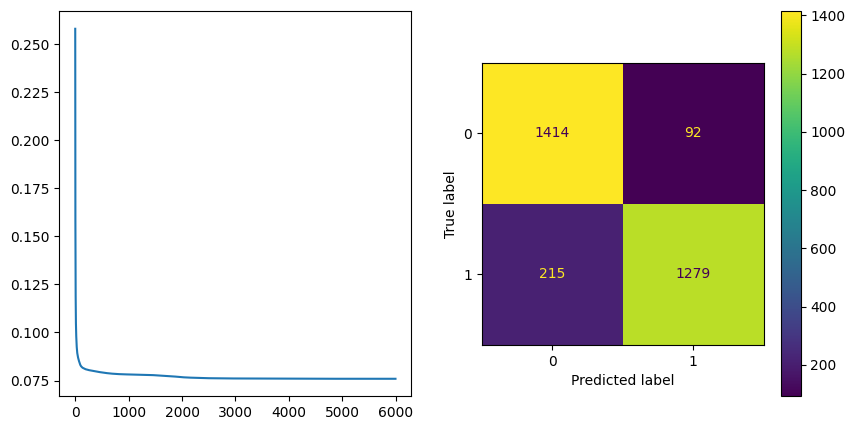

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
label_pred = np.where(ah2o > 0.5, 1, 0)
cm = confusion_matrix(y, label_pred)
ConfusionMatrixDisplay(cm).plot(ax = ax[1])

acc = accuracy_score(y, label_pred)

ax[0].plot(losses)

#### **Adding batching**

The function below, **batch_data** will make some random batches of data of a certain size. It starts by asserting that amount of rows in X and y are equal. Then it uses numpys np.random.permutation function to create a random permutation of the indices from 0 to N, with N being the amount of rows. By then subsetting the X and y arrays with these random indices, we have shuffled our data randomly in unison. The function is specifically a generator, so it yields one value at a time, instead of holding all batches in memory at the same time, which should result in a faster function. So back to the function, in the terminal for-loop, we iterate over all numbers from 0 to N in steps of batch_size with a variable we call ndx and at each step the generator yields a subset of the shuffled X and y from the current ndx to min(ndx+batch_size, N), so ndx+batch_size if thats less than N, otherwise just up to N. That condition is just to make sure that we don't try to return a subset that goes past our N.

In [ ]:
def batch_data(X, y, batch_size=64):
  assert X.shape[0] == y.shape[0], "features and labels don't have the same number of rows!"

  N = X.shape[0]
  idx = np.random.permutation(N)
  X_shuffled, y_shuffled = X[idx], y[idx]

  for ndx in range(0, N, batch_size):
        yield (X_shuffled[ndx:min(ndx + batch_size, N)], y_shuffled[ndx:min(ndx + batch_size, N)])

In [ ]:
losses = []
epochs = 1000

hidden_layer_1_nodes = 5
hidden_layer_2_nodes = 5

eta = 0.001

activation_1, activation_2 = relu, relu
activation_1_prime, activation_2_prime = relu_prime, relu_prime
activation_3 = sigmoid
activation_3_prime = sigmoid_prime


#w_ih1 = np.random.randn(hidden_layer_1_nodes, M+1).T
w_ih1 = tst = xavier_init(M+1, hidden_layer_1_nodes)
#w_h1_h2 = np.random.randn(hidden_layer_2_nodes, hidden_layer_1_nodes+1).T
w_h1_h2 = xavier_init(hidden_layer_1_nodes+1, hidden_layer_2_nodes)
#w_ho = np.random.randn(1, hidden_layer_2_nodes+1).T
w_ho = xavier_init(hidden_layer_2_nodes+1, 1)

for epoch in tqdm(range(epochs)):

  iter_count = 0

  for batch_X, batch_y in batch_data(X,y, batch_size=64*2):
    # Forward propagation
    Xp = add_ones(batch_X)
    zih = np.dot(Xp, w_ih1)
    aih = activation_1(zih)

    aih1p = add_ones(aih)
    zh1 = np.dot(aih1p, w_h1_h2)
    ah1 = activation_2(zh1)

    ah2op = add_ones(ah1)
    zh2o = np.dot(ah2op, w_ho)
    ah2o = activation_3(zh2o)

    error = (batch_y-ah2o)

    if iter_count % 100 == 0:
      losses.append(np.mean(error**2))

    # Backpropagation

    dC_daoh = -error # dC/dA = -(y-aoh)
    daoh_dzoh = activation_3_prime(zh2o)
    dC_dzoh = dC_daoh * daoh_dzoh
    grad_ho = np.dot(ah2op.T, dC_dzoh)

    dC_dzh1h2 = dC_dzoh * activation_2_prime(zh1)
    grad_h1h2 = np.dot(aih1p.T, dC_dzh1h2)

    dC_dzih = dC_dzh1h2 * activation_1_prime(zih)

    grad_ih = np.dot(Xp.T, dC_dzih)

    w_ih1 -= eta * grad_ih
    w_h1_h2 -= eta * grad_h1h2
    w_ho -= eta * grad_ho

    iter_count +=1

100%|██████████| 1000/1000 [00:03<00:00, 295.05it/s]


In [ ]:
Xp = add_ones(X)
zih = np.dot(Xp, w_ih1)
aih = activation_1(zih)
aih1p = add_ones(aih)
zh1 = np.dot(aih1p, w_h1_h2)
ah1 = activation_2(zh1)
ah2op = add_ones(ah1)
zh2o = np.dot(ah2op, w_ho)
ah2o = activation_3(zh2o)

ypred = ah2o
label_pred = np.where(ypred > 0.5, 1, 0)

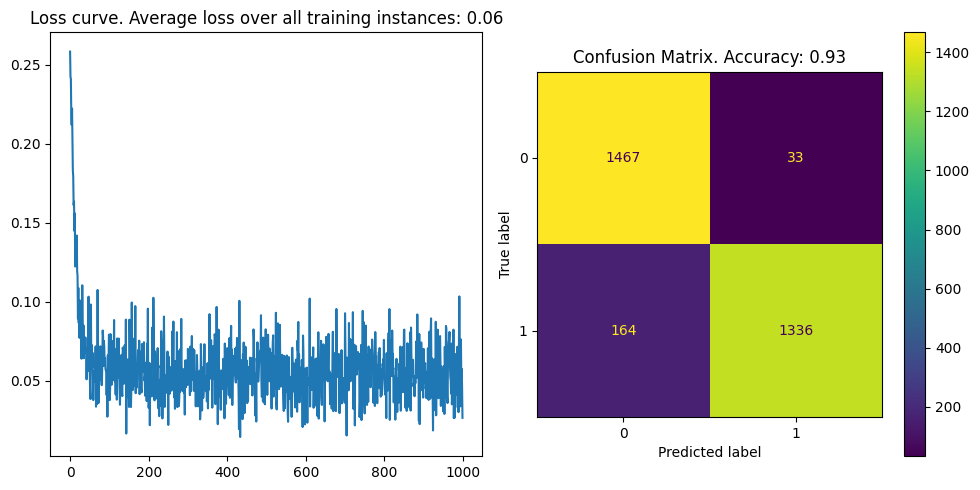

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
cm = confusion_matrix(y, label_pred)
acc = accuracy_score(y, label_pred)

ConfusionMatrixDisplay(cm).plot(ax = ax[1])
ax[1].set_title(f"Confusion Matrix. Accuracy: {round(acc,2)}")

loss_array = np.array(losses)
ax[0].plot(loss_array)
ax[0].set_title(f"Loss curve. Average loss over all training instances: {loss_array.mean().round(2)}")
plt.tight_layout()


#### An Object Oriented Implementation of a Neural Network

It would be nice if everytime we wanted to change the structure of our network, like the number of layers, nodes, activation functions, whether to apply things like batching and regularization, that we didn't have to go back and change a bunch of confusing variables as well as introduce new variables when rewriting the back - and forward propagation to accomodate for new layers and nodes.

One way to solve this and make the code much more readable - at least in my opinion - is to use object oriented programming, and implement the network and layers as two classes. If we write a class, Layer, that can store all the properties of a layer as it's attributes, such as it's current weights ($W$) ,input ($X$), current transfer ($z = X W$) and current activation ($\sigma(z)$), as well as the derivative of its current transfer ($\sigma'(z)$), then it will be fairly easy to write a general implementation of the forward and backpropagation algorithms, that will apply to an arbitrary number of layers and nodes within these layers.

I will like the above example write the class to use mini-batch gradient descent, so that gradients are calculated based on a randomly selected subset of the data of a certain batch size. Also i will add the possibility to add a regularization term to our model.

#### **What is regularization?**
With regularization we penalize the model for having large weights by adding to the error a constant factor $\lambda$ times some measure of the value of the weights. For L1 regularization the absolute value of the weights summed, that is:

$error = (y-\hat{y})+\lambda \sum_i{\vert w_i \vert}$

For L2 regularization we instead use the squared magnitude of the weights, that is:

$error = (y-\hat{y})+\lambda \sum_i{w_i^2}$

To consider the effects of this, let's look at the example of L1 regularization. When we add the absolute sum of the weights to the error term,



In [ ]:
class Layer():

    def __init__(self, no_inputs, no_nodes, activation_function):
      self.no_inputs = no_inputs
      self.no_nodes = no_nodes
      self.activation_function = activation_function
      self.initialize_activation_function()

    def initialize_activation_function(self):

      if self.activation_function == 'relu':
        self.activation = lambda X: np.maximum(0,X)
        self.activation_prime = lambda X: np.where(X <= 0, 0, 1)

      elif self.activation_function == 'sigmoid':
        self.activation = lambda X: 1 / (1 + np.exp(-X))
        self.activation_prime = lambda X: self.activation(X) * (1-self.activation(X))

    def initialize_weights(self):
      def random_initialization():
        return np.random.randn(self.no_nodes, self.no_inputs+1).T

      self.W = random_initialization()

    def activate(self, X):

      def add_ones(X):
        ones = np.ones((X.shape[0], 1))
        return np.hstack((ones, X))

      self.Xp = add_ones(X)
      self.z = np.dot(self.Xp, self.W)
      self.a = self.activation(self.z)
      self.dadz = self.activation_prime(self.z)

    def calculate_error_and_grad(self, prev_error):
      """For any layer, we can calculate the error as the error in the previous layer, multiplied by act'(z)"""
      self.hidden_error = prev_error * self.dadz
      self.grad = np.dot(self.Xp.T, self.hidden_error)

    def update_weights(self, eta):
      self.W -= eta * self.grad


In [ ]:
n_classes = 2
n_features = 6
samples = 3000
X, y = make_classification(n_samples = samples, n_features = n_features, n_classes = n_classes)
y = y.reshape(-1,1)
X = std_scale(X)
#X = minmax_scaler(X)
N, M = X.shape

In [ ]:
hidden_layer = Layer(M, 5, 'relu')
hidden_layer_2 = Layer(5, 5, 'relu')
hidden_layer_3 = Layer(5, 5, 'relu')
output_layer = Layer(5, 1, 'sigmoid')

In [1]:
class NeuralNet():

  def __init__(self, layers):
    self.layers = layers

  def initialize_weights(self):
    for layer in self.layers:
      layer.initialize_weights()

  def forward_propagate(self):
    a = self.X

    for layer in self.layers:
      layer.activate(a)
      a = layer.a
    self.ypred = a

  def back_propagate(self):
    dC_daoh = -self.error
    self.current_error = dC_daoh

    for layer in self.layers[::-1]:
      layer.calculate_error_and_grad(self.current_error)
      self.current_error = layer.hidden_error
      layer.update_weights(self.eta)

  def train(self, X, y, epochs = 100, eta = 1e-8, batch_size = 64):
    self.batch_size = batch_size
    self.full_X, self.full_y = X, y
    self.eta, self.losses = eta, []

    self.initialize_weights()

    for epoch in tqdm(range(epochs)):
      for batch_X, batch_y in batch_data(self.full_X,self.full_y, batch_size=64*2):
        self.X, self.y = batch_X, batch_y
        self.forward_propagate()
        self.error = (self.y-self.ypred)
        self.losses.append(np.mean(self.error**2))
        self.back_propagate()

In [ ]:
layers = [hidden_layer, hidden_layer_2, hidden_layer_3, output_layer]
net = NeuralNet(layers = layers)
net.train(X,y, epochs = 1000, eta = 1e-4, batch_size = 64*4)

100%|██████████| 1000/1000 [00:05<00:00, 195.36it/s]


Text(0.5, 1.0, 'Mean loss: 0.11')

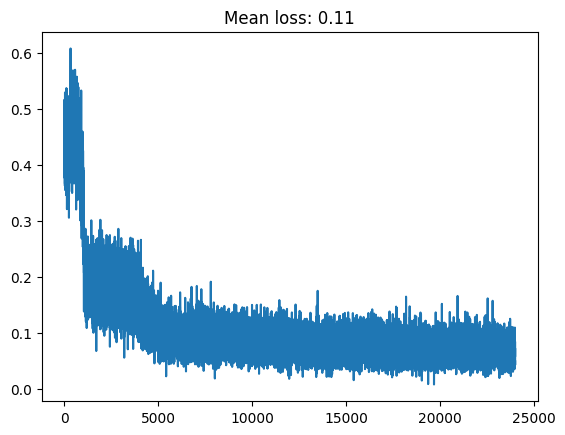

In [ ]:
plt.plot(net.losses)
plt.title(f"Mean loss: {np.array(net.losses).mean().round(2)}")

#### Building Neural Networks for the ESOL dataset

1. A binary classifier for low or high solubility
2. A predictor of the numerical value of log(s)
